# Sample Exploratoty Data Analysis Weather

In [1]:
import warnings
warnings.filterwarnings('ignore')

### Importacion de librerias

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt   # gráficos

In [10]:
sns.get_dataset_names() # lista de datasets disponibles

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

### Montaje de Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Lectura de datos


In [5]:
#read a csv file

#  df_completo = pd.read_csv('trabajo practico 1/weather.csv') # en caso de que se use de manera local
df=pd.read_csv("C:/Users/inu/Documents/ia/trabajo practico 1/dataset/weather.csv")
df.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0      8.0     24.3       0.0          3.4       6.3          NW   
1     14.0     26.9       3.6          4.4       9.7         ENE   
2     13.7     23.4       3.6          5.8       3.3          NW   
3     13.3     15.5      39.8          7.2       9.1          NW   
4      7.6     16.1       2.8          5.6      10.6         SSE   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  Humidity3pm  \
0           30.0         SW         NW           6.0  ...           29   
1           39.0          E          W           4.0  ...           36   
2           85.0          N        NNE           6.0  ...           69   
3           54.0        WNW          W          30.0  ...           56   
4           50.0        SSE        ESE          20.0  ...           49   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1019.7       1015.0         7         7     14.4     23.6         No   
1       1012.4       1008.4         5         3     17.5     25.7        Yes   
2       1009.5       1007.2         8         7     15.4     20.2        Yes   
3       1005.5       1007.0         2         7     13.5     14.1        Yes   
4       1018.3       1018.5         7         7     11.1     15.4        Yes   

   RISK_MM RainTomorrow  
0      3.6          Yes  
1      3.6          Yes  
2     39.8          Yes  
3      2.8          Yes  
4      0.0           No  

[5 rows x 22 columns]

In [ ]:
# df.columns    #ver columas

### Reseteamos el indice 
* Dumplicamos el indice y lo usamos como columna


In [ ]:
df.reset_index(drop=False, inplace=True)
df.head()

index  Temperatura Minima  Temperatura Maxima  Caudal de lluvia  \
0      0                 8.0                24.3               0.0   
1      1                14.0                26.9               3.6   
2      2                13.7                23.4               3.6   
3      3                13.3                15.5              39.8   
4      4                 7.6                16.1               2.8   

   Evaporacion  Soleado WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  \
0          3.4      6.3          NW           30.0         SW         NW  ...   
1          4.4      9.7         ENE           39.0          E          W  ...   
2          5.8      3.3          NW           85.0          N        NNE  ...   
3          7.2      9.1          NW           54.0        WNW          W  ...   
4          5.6     10.6         SSE           50.0        SSE        ESE  ...   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0           29       1019.7       1015.0         7         7     14.4   
1           36       1012.4       1008.4         5         3     17.5   
2           69       1009.5       1007.2         8         7     15.4   
3           56       1005.5       1007.0         2         7     13.5   
4           49       1018.3       1018.5         7         7     11.1   

   Temp3pm  dia de lluvia  RISK_MM  Mañana va a lluver  
0     23.6             No      3.6                 Yes  
1     25.7            Yes      3.6                 Yes  
2     20.2            Yes     39.8                 Yes  
3     14.1            Yes      2.8                 Yes  
4     15.4            Yes      0.0                  No  

[5 rows x 23 columns]

In [ ]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [ ]:
list_columns_renames = {"index": "Dias",
                "MinTemp": "Temperatura Minima",
                "MaxTemp": "Temperatura Maxima",
                "Rainfall": "Caudal de lluvia",
                "Evaporation": "Evaporacion",
                "Sunshine": "Soleado",
                "RainToday": "dia de lluvia",
                "RainTomorrow": "Mañana va a lluver",              
                }

In [ ]:
#renombrar las columnas de interes
df.rename(columns=list_columns_renames, inplace=True)

In [ ]:
# df.head()

In [ ]:
# calculamos relación entre humedad y temperatura a las 3pm
temp_hum = df.Temp3pm / df.Humidity3pm

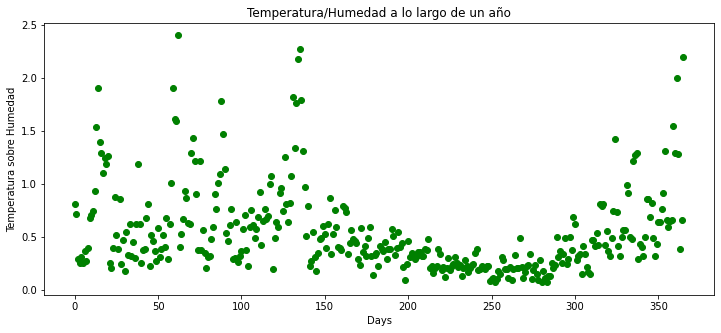

In [ ]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(12)
plot1 = fig.add_subplot()
plot1.set_xlabel('Days')
plot1.set_ylabel('Temperatura sobre Humedad')
plot1.set_title('Temperatura/Humedad a lo largo de un año')
plot1.scatter(df["Dias"] , temp_hum, color='green')
plt.show()

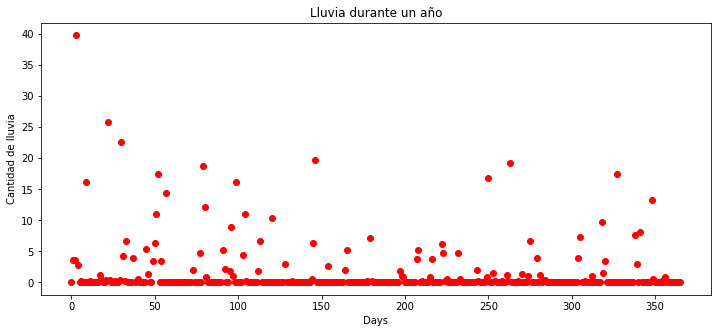

In [ ]:
# Dias de lluvia 
# Lo quisimos plotear para ver si habia relacion con el grafico de temperatura/humedad
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(12)
plot1 = fig.add_subplot()
plot1.set_xlabel('Days')
plot1.set_ylabel('Cantidad de lluvia')
plot1.set_title('Lluvia durante un año')
plot1.scatter(df.Dias, df["Caudal de lluvia"], color='red')
plt.show()

In [ ]:
# df.columns

In [ ]:
# tambien existe df.drop(columns=list_of_columns, inplace=True) que es de pandas
def drop_columns(df, columns):
    for column in columns:
        df.drop(column, axis=1, inplace=True)
        
list_drop_columns = ["Evaporacion", 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm']
drop_columns(df,list_drop_columns)

In [ ]:
df.head()

Dias  Temperatura Minima  Temperatura Maxima  Caudal de lluvia  Soleado  \
0     0                 8.0                24.3               0.0      6.3   
1     1                14.0                26.9               3.6      9.7   
2     2                13.7                23.4               3.6      3.3   
3     3                13.3                15.5              39.8      9.1   
4     4                 7.6                16.1               2.8     10.6   

  dia de lluvia  RISK_MM Mañana va a lluver  
0            No      3.6                Yes  
1           Yes      3.6                Yes  
2           Yes     39.8                Yes  
3           Yes      2.8                Yes  
4           Yes      0.0                 No

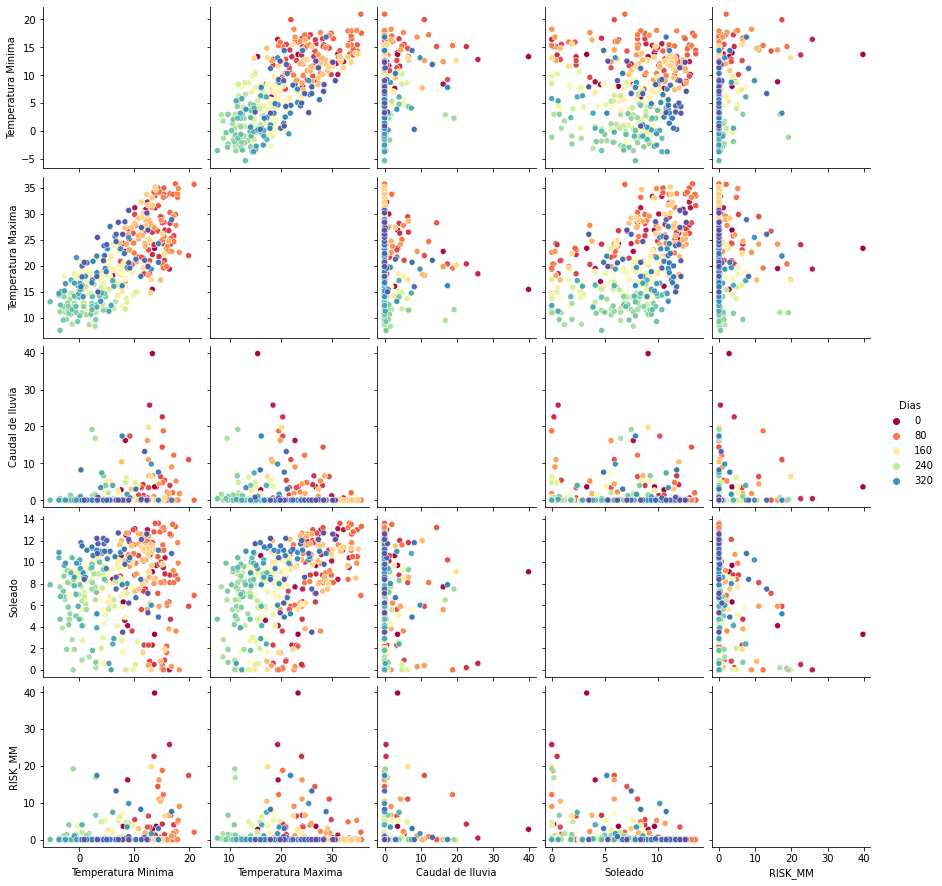

In [ ]:
sns.pairplot(df, hue="Dias",palette= "Spectral")

In [1]:
# df.columns

In [ ]:
relacion =df[['Dias', 'Temperatura Minima', 'Temperatura Maxima','Soleado']]
relacion.head()

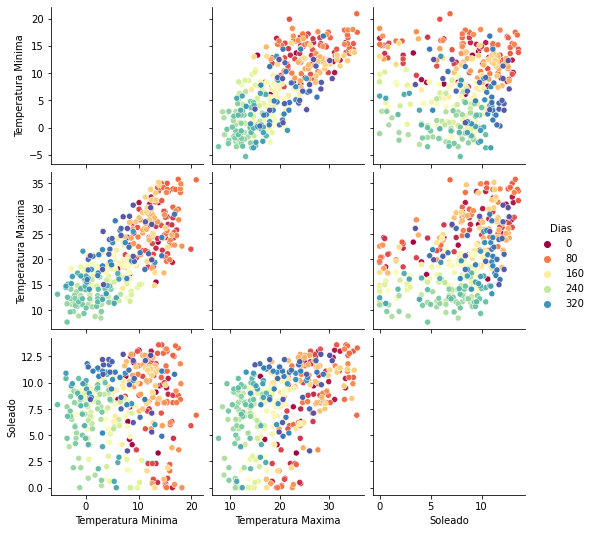

In [ ]:
sns.pairplot(relacion, hue="Dias",palette= "Spectral", height=2.5)

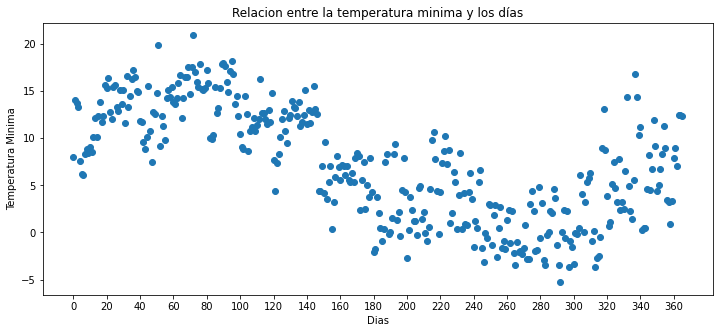

In [ ]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(12)
plot1 = fig.add_subplot()
plot1.set_xlabel('Dias')
plot1.set_ylabel('Temperatura Minima')
plot1.set_title('Relacion entre la temperatura minima y los días')
plot1.set_xticks(list(range(0, 370, 20)))
plot1.scatter(df["Dias"], df["Temperatura Minima"])
plt.show()

In [ ]:
# df.columns

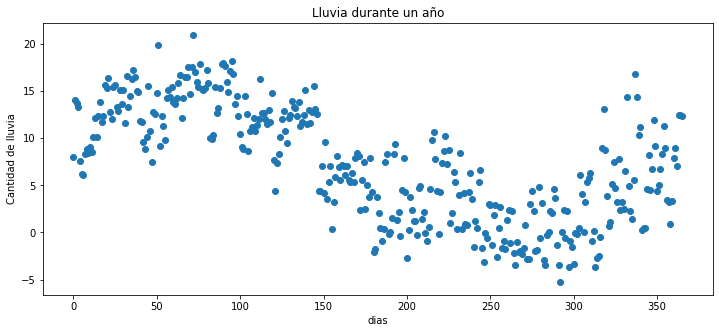

In [ ]:
# Dias de lluvia 
# Lo quisimos plotear para ver si habia relacion con el grafico de temperatura/humedad
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(12)
plot1 = fig.add_subplot()
plot1.set_xlabel('dias')
plot1.set_ylabel('Cantidad de lluvia')
plot1.set_title('Lluvia durante un año')
plot1.scatter(df["Dias"], df["Temperatura Minima"])
plt.show()

In [ ]:
df_min_max = df[['Temperatura Minima', 'Temperatura Maxima']]
df_min_max

Temperatura Minima  Temperatura Maxima
0                   8.0                24.3
1                  14.0                26.9
2                  13.7                23.4
3                  13.3                15.5
4                   7.6                16.1
..                  ...                 ...
361                 9.0                30.7
362                 7.1                28.4
363                12.5                19.9
364                12.5                26.9
365                12.3                30.2

[366 rows x 2 columns]

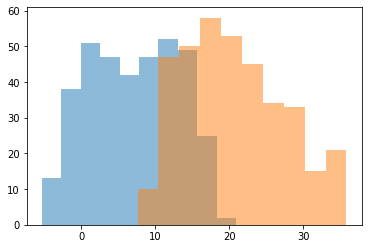

In [ ]:
for col in df_min_max:
    plt.hist(df[col], alpha=0.5)

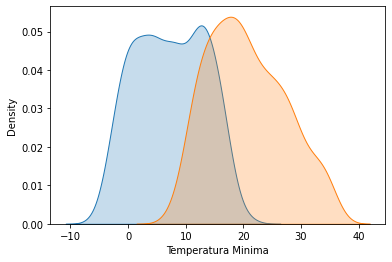

In [ ]:
for col in df_min_max:
    sns.kdeplot(df[col], shade=True)

In [ ]:
# df_min_max.head()

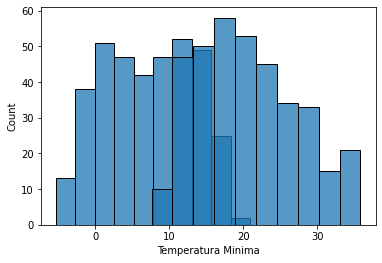

In [ ]:
sns.histplot(df['Temperatura Minima'])
sns.histplot(df['Temperatura Maxima'])

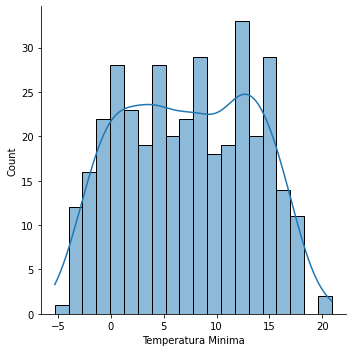

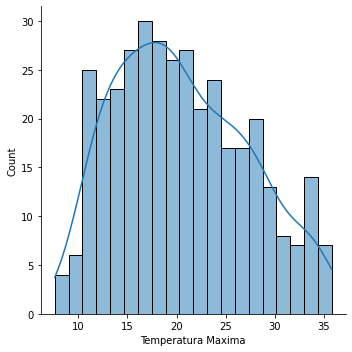

In [ ]:
sns.displot(df['Temperatura Minima'], bins=20, kde=True)
sns.displot(df['Temperatura Maxima'],bins=20, kde=True)

In [ ]:
df_completo.reset_index(drop=False, inplace=True)
df_completo.tail()

index  Dias  Temperatura Minima  Temperatura Maxima  Caudal de lluvia  \
361    361   361                 9.0                30.7               0.0   
362    362   362                 7.1                28.4               0.0   
363    363   363                12.5                19.9               0.0   
364    364   364                12.5                26.9               0.0   
365    365   365                12.3                30.2               0.0   

     Soleado dia de lluvia  RISK_MM Mañana va a lluver  
361     12.1            No      0.0                 No  
362     12.7            No      0.0                 No  
363      5.3            No      0.0                 No  
364      7.1            No      0.0                 No  
365     12.6            No      0.0                 No

In [ ]:
df_completo=pd.read_csv("/content/drive/Shareddrives/IA/weather (1).csv")

In [ ]:
df_completo.dtypes

MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm       int64
Humidity9am        int64
Humidity3pm        int64
Pressure9am      float64
Pressure3pm      float64
Cloud9am           int64
Cloud3pm           int64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

In [ ]:
# df_completo.values
# df_completo.size
# df_completo.index
# df_completo.columns

In [ ]:
df_completo.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [ ]:
df_completo[["MinTemp","MinTemp"]].head(), df_completo[['Pressure9am', 'Pressure3pm','Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm']].head()

(   MinTemp  MinTemp
 0      8.0      8.0
 1     14.0     14.0
 2     13.7     13.7
 3     13.3     13.3
 4      7.6      7.6,
    Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm
 0       1019.7       1015.0         7         7     14.4     23.6
 1       1012.4       1008.4         5         3     17.5     25.7
 2       1009.5       1007.2         8         7     15.4     20.2
 3       1005.5       1007.0         2         7     13.5     14.1
 4       1018.3       1018.5         7         7     11.1     15.4)

# Regrecion lineal

## Cargar libreria


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns

In [4]:
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing



In [5]:
# Flexible integration for any Python script
import wandb

In [8]:
wandb.init(project="test-project", entity="ml_ialab")

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\inu/.netrc


### Montaje de Drive

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# ruta_drive = "/content/drive/Shareddrives/IA/autos.TXT"
ruta_local_cm = "C:/Users/inu/Documents/ia/trabajo practico 1/dataset/autos.TXT"

In [7]:
df=pd.read_csv(ruta_local_cm, sep='\t')

In [8]:
df.head()

normalized-losses         make fuel-type aspiration num-of-doors  \
0              122.0  alfa-romero       gas        std          two   
1              122.0  alfa-romero       gas        std          two   
2              122.0  alfa-romero       gas        std          two   
3              164.0         audi       gas        std         four   
4              164.0         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  length  ...  \
0  convertible          rwd           front        88.6   168.8  ...   
1  convertible          rwd           front        88.6   168.8  ...   
2    hatchback          rwd           front        94.5   171.2  ...   
3        sedan          fwd           front        99.8   176.6  ...   
4        sedan          4wd           front        99.4   176.6  ...   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0      111.0    5000.0     21.0   
1         mpfi  3.47    2.68               9.0      111.0    5000.0     21.0   
2         mpfi  2.68    3.47               9.0      154.0    5000.0     19.0   
3         mpfi  3.19    3.40              10.0      102.0    5500.0     24.0   
4         mpfi  3.19    3.40               8.0      115.0    5500.0     18.0   

   highway-mpg    price  symboling  
0         27.0  13495.0         _3  
1         27.0  16500.0         _3  
2         26.0  16500.0         _1  
3         30.0  13950.0         _2  
4         22.0  17450.0         _2  

[5 rows x 26 columns]

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [12]:
df.reset_index(drop=False, inplace=True)
list_columns_renames = {"index": "Indice"}
df.rename(columns=list_columns_renames, inplace=True)

In [13]:
df.tail()

Indice  normalized-losses   make fuel-type aspiration num-of-doors  \
200     200               95.0  volvo       gas        std         four   
201     201               95.0  volvo       gas      turbo         four   
202     202               95.0  volvo       gas        std         four   
203     203               95.0  volvo    diesel      turbo         four   
204     204               95.0  volvo       gas      turbo         four   

    body-style drive-wheels engine-location  wheel-base  ...  fuel-system  \
200      sedan          rwd           front       109.1  ...         mpfi   
201      sedan          rwd           front       109.1  ...         mpfi   
202      sedan          rwd           front       109.1  ...         mpfi   
203      sedan          rwd           front       109.1  ...          idi   
204      sedan          rwd           front       109.1  ...         mpfi   

     bore  stroke  compression-ratio horsepower peak-rpm  city-mpg  \
200  3.78    3.15                9.5      114.0   5400.0      23.0   
201  3.78    3.15                8.7      160.0   5300.0      19.0   
202  3.58    2.87                8.8      134.0   5500.0      18.0   
203  3.01    3.40               23.0      106.0   4800.0      26.0   
204  3.78    3.15                9.5      114.0   5400.0      19.0   

    highway-mpg    price  symboling  
200        28.0  16845.0        _-1  
201        25.0  19045.0        _-1  
202        23.0  21485.0        _-1  
203        27.0  22470.0        _-1  
204        25.0  22625.0        _-1  

[5 rows x 27 columns]

In [14]:
marcas = df["make"].unique()
print("En el dataseet, estas son las marcas de autos que se analizaran: ", (marcas))

En el dataseet, estas son las marcas de autos que se analizaran:  ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']


In [32]:
print("Numero de muestras: %d" %len(df))
print("Numero de caracteristicas: %d" %len(df.columns))

Numero de muestras: 205
Numero de caracteristicas: 27


In [33]:
horsepower_100 = df[df.horsepower > 100]
print("Hay %d autos con mas de 100 caballos de fuerza" %len(horsepower_100))

Hay 94 autos con mas de 100 caballos de fuerza


In [38]:
engine_location = df[df["engine-location"] == "front"]
print("%d de las muestras, poseen traccion delantera" %len(engine_location), "de %d" %len(df), " por lo qu esta caracteristica no aporta informacion significativa")

202 de las muestras, poseen traccion delantera de 205  por lo qu esta caracteristica no aporta informacion significativa


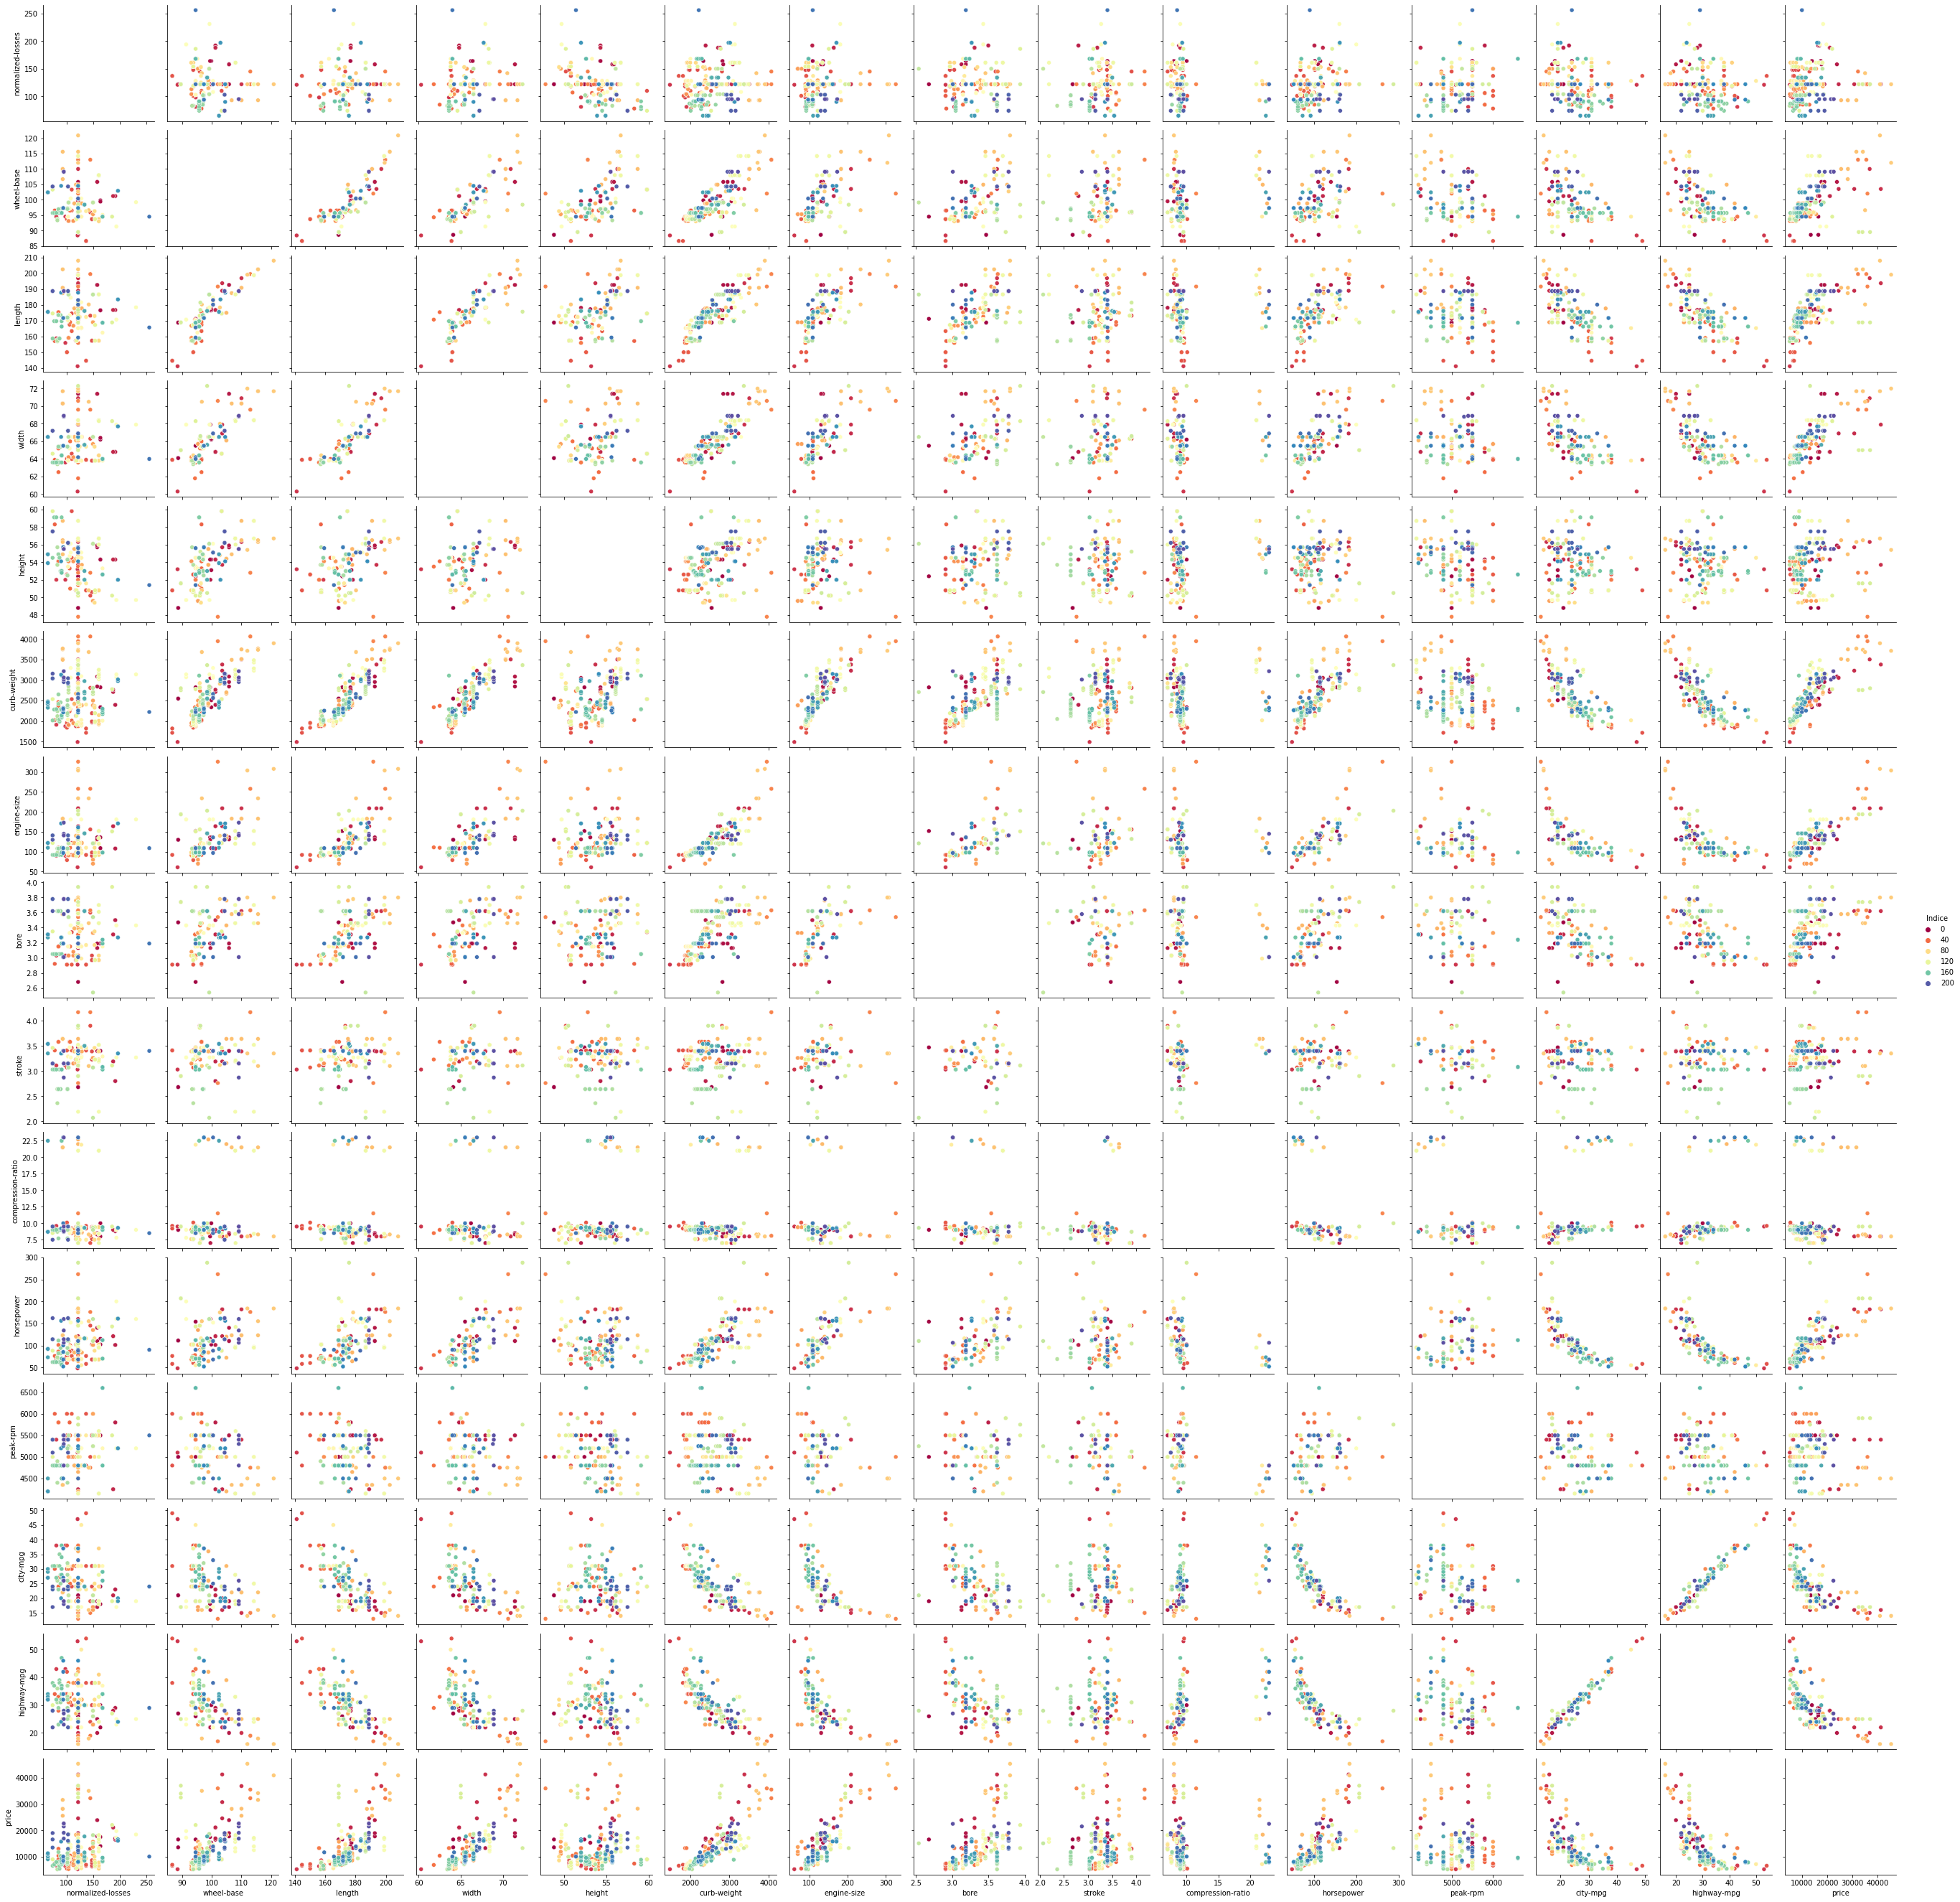

In [26]:
sns.pairplot(df, hue="Indice", palette= "Spectral", height=2.5)

In [59]:
df.head()

Indice  normalized-losses         make fuel-type aspiration num-of-doors  \
0       0              122.0  alfa-romero       gas        std          two   
1       1              122.0  alfa-romero       gas        std          two   
2       2              122.0  alfa-romero       gas        std          two   
3       3              164.0         audi       gas        std         four   
4       4              164.0         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  fuel-system  \
0  convertible          rwd           front        88.6  ...         mpfi   
1  convertible          rwd           front        88.6  ...         mpfi   
2    hatchback          rwd           front        94.5  ...         mpfi   
3        sedan          fwd           front        99.8  ...         mpfi   
4        sedan          4wd           front        99.4  ...         mpfi   

   bore  stroke  compression-ratio horsepower peak-rpm  city-mpg highway-mpg  \
0  3.47    2.68                9.0      111.0   5000.0      21.0        27.0   
1  3.47    2.68                9.0      111.0   5000.0      21.0        27.0   
2  2.68    3.47                9.0      154.0   5000.0      19.0        26.0   
3  3.19    3.40               10.0      102.0   5500.0      24.0        30.0   
4  3.19    3.40                8.0      115.0   5500.0      18.0        22.0   

     price  symboling  
0  13495.0         _3  
1  16500.0         _3  
2  16500.0         _1  
3  13950.0         _2  
4  17450.0         _2  

[5 rows x 27 columns]

In [40]:
df.columns

Index(['Indice', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'symboling'],
      dtype='object')

In [15]:
numerical_features = df[['Indice', 'normalized-losses', 'wheel-base', 'bore', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price' ]]

In [42]:
numerical_features.head()

Indice  normalized-losses  wheel-base  bore  compression-ratio  horsepower  \
0       0              122.0        88.6  3.47                9.0       111.0   
1       1              122.0        88.6  3.47                9.0       111.0   
2       2              122.0        94.5  2.68                9.0       154.0   
3       3              164.0        99.8  3.19               10.0       102.0   
4       4              164.0        99.4  3.19                8.0       115.0   

   peak-rpm  city-mpg  highway-mpg    price  
0    5000.0      21.0         27.0  13495.0  
1    5000.0      21.0         27.0  16500.0  
2    5000.0      19.0         26.0  16500.0  
3    5500.0      24.0         30.0  13950.0  
4    5500.0      18.0         22.0  17450.0

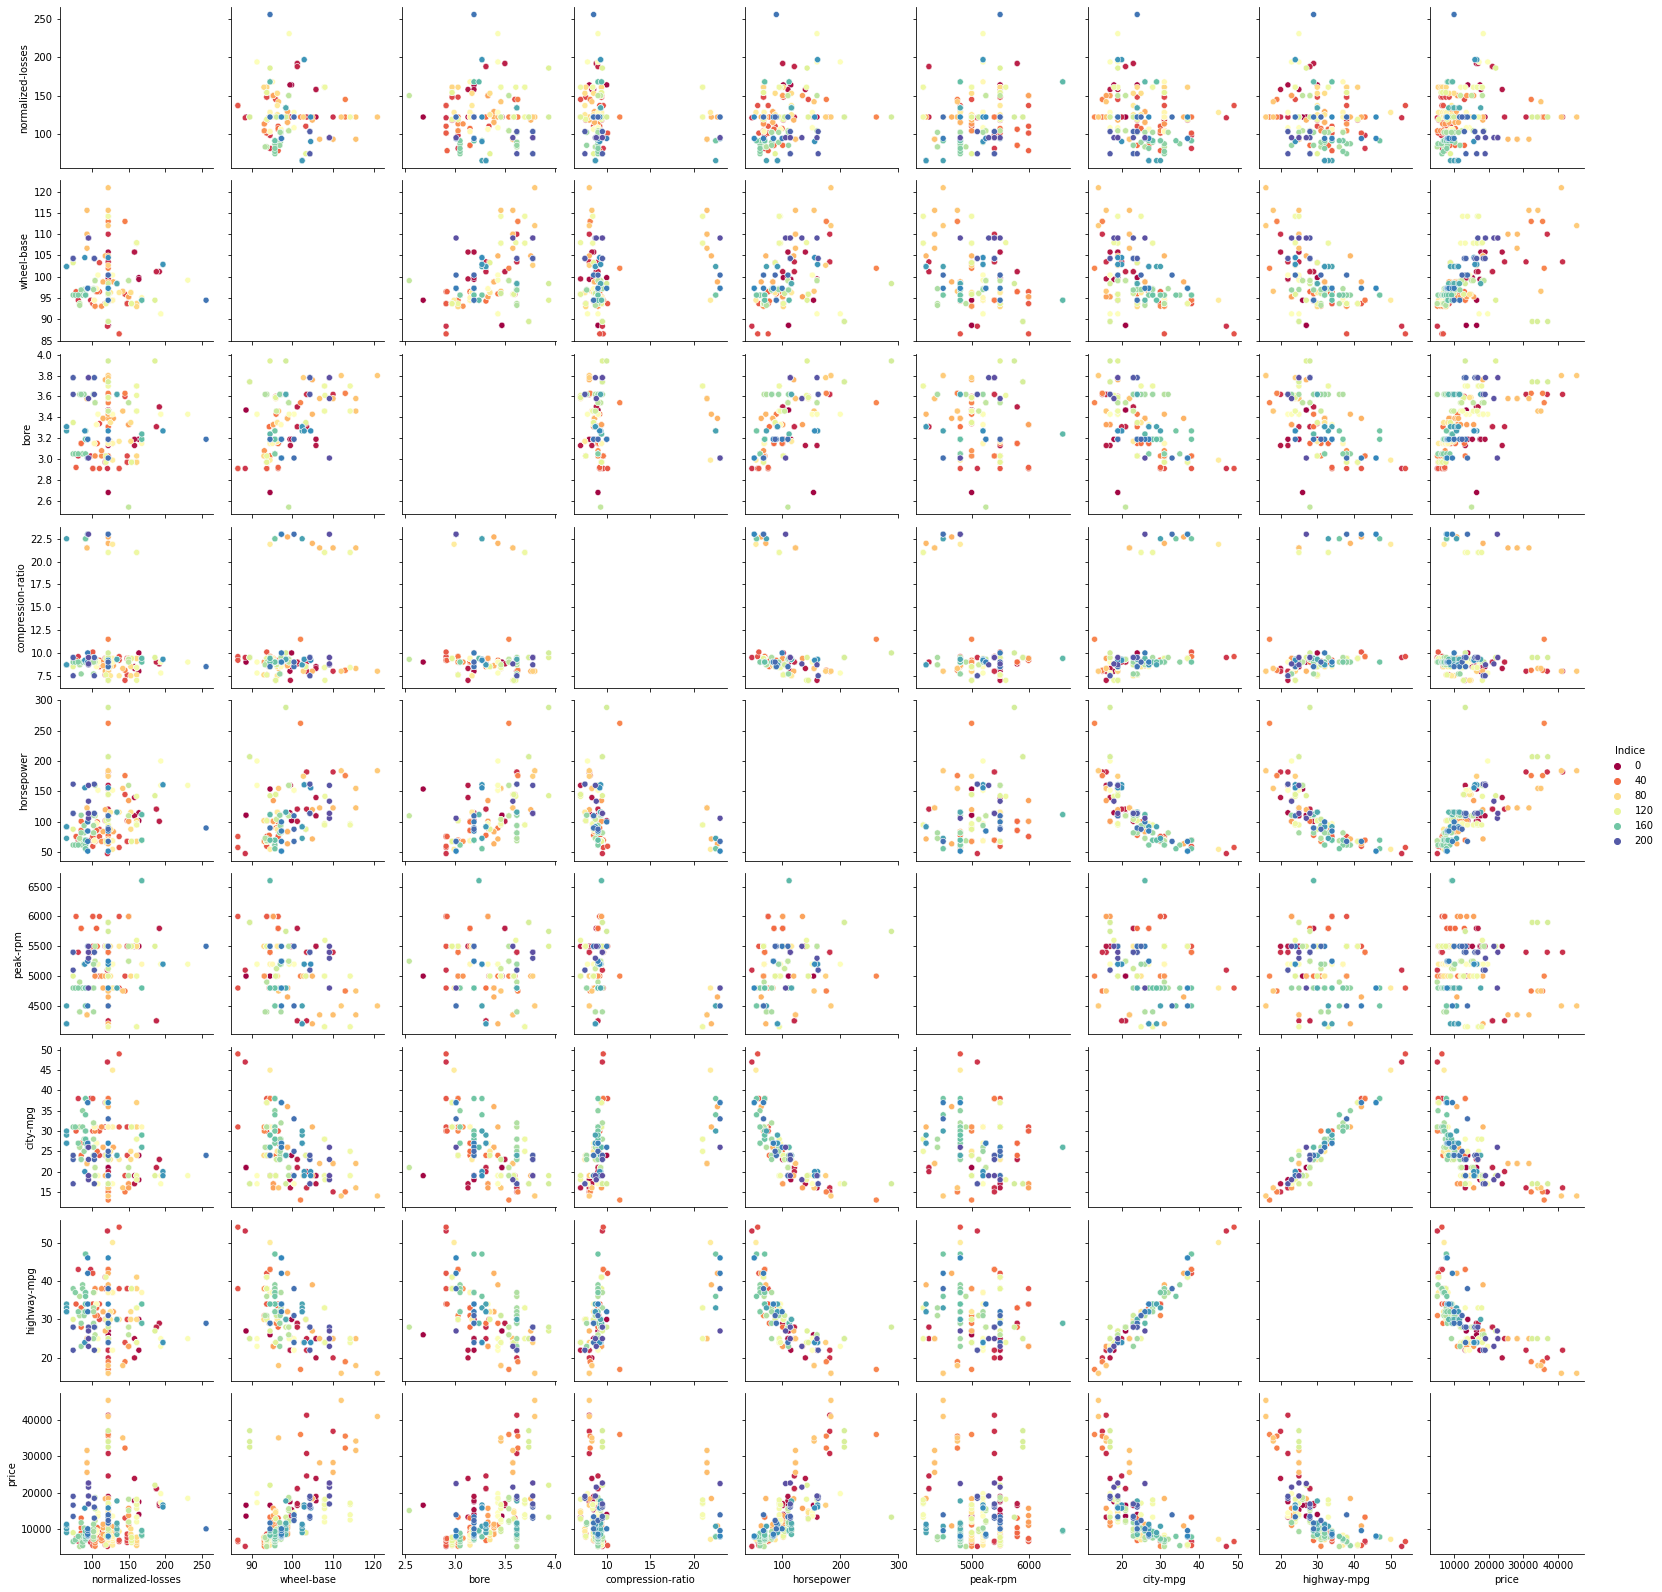

In [25]:
sns.pairplot(numerical_features, hue="Indice", palette= "Spectral", height=2.5) 

Vemos que existe una relacion practicamente lineal entre la velocidad en carretera en relacion a la velocidad en ciudad, no es evidente otra relacion peor se analizara el Precio en funcion de los caballos de fuerza

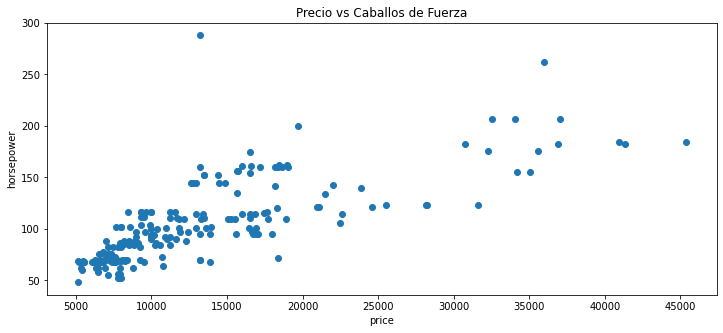

In [11]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(12)
plot1 = fig.add_subplot()
plot1.set_xlabel('price')
plot1.set_ylabel('horsepower')
plot1.set_title('Precio vs Caballos de Fuerza')
plot1.scatter(df["price"], df["horsepower"])
plt.show()

<AxesSubplot:xlabel='price', ylabel='horsepower'>

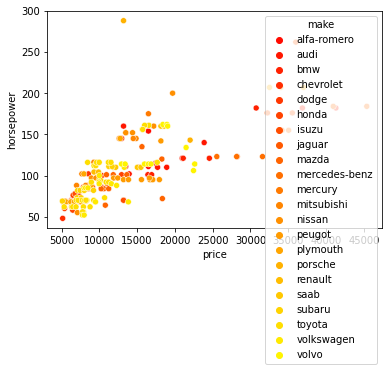

In [16]:
sns.scatterplot(x="price", y="horsepower", data=df,hue="make", palette= "autumn")

<AxesSubplot:xlabel='price', ylabel='Count'>

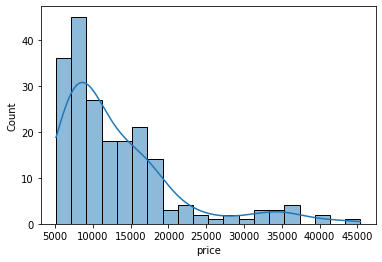

In [17]:
sns.histplot(df['price'],bins=20, kde=True)

In [16]:
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

df_mean_norm = mean_norm(df[["price","horsepower"]])

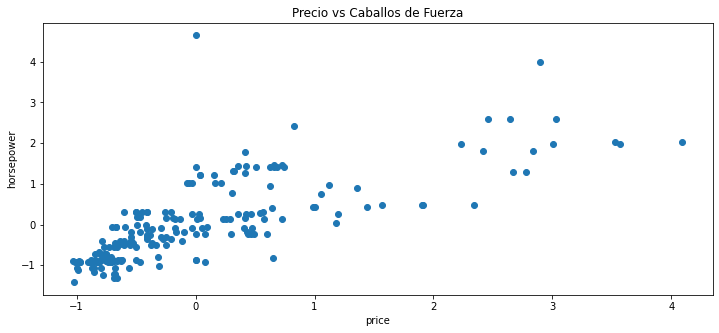

In [18]:
fig = plt.figure() #cuiosos que lo normaliza para plotearlo
fig.set_figheight(5)
fig.set_figwidth(12)
plot1 = fig.add_subplot()
plot1.set_xlabel('price')
plot1.set_ylabel('horsepower')
plot1.set_title('Precio vs Caballos de Fuerza')
plot1.scatter(df_mean_norm["price"], df_mean_norm["horsepower"])
plt.show()

In [19]:
X=df_mean_norm['price']
X=np.array(X)

Y=df_mean_norm['horsepower']
Y=np.array(Y)

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [26]:
X_train_reshape=X_train.reshape(-1,1)
Y_train_reshape=Y_train.reshape(-1,1)

me indica como esta la variable (la tengo en 1d y debo pasarla a 2d)

In [49]:
X_train.shape

(164,)

In [47]:
Y_train_reshape.shape

(164, 1)

In [20]:
# 1. Start a W&B run and save hyperparameters
wandb.init(project="test-project", entity="ml_ialab")

In [27]:
regresion=linear_model.LinearRegression()

In [28]:
regresion.fit(X_train_reshape,Y_train_reshape)

LinearRegression()

In [29]:
regresion.coef_

array([[0.79404188]])

In [30]:
regresion.intercept_

array([0.02257253])

In [32]:
X_test_reshape=X_test.reshape(-1,1)
Y_test_reshape=Y_test.reshape(-1,1)

In [33]:
predict=regresion.predict(X_test_reshape)

In [34]:
mean_squared_error(Y_test_reshape, predict)

0.35598189302403543

In [35]:

# Model training here

# 2. Log metrics over time to visualize performance
wandb.log({"loss": mean_squared_error(Y_test_reshape, predict)})

In [36]:
regresion.score(X_train_reshape, Y_train_reshape)

0.5695046567880572

In [37]:
regresion.score(X_test_reshape, Y_test_reshape)

0.585111360652316

Text(0, 0.5, 'Caballos de Fuerza')

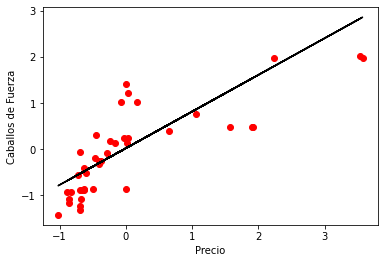

In [38]:
plt.scatter(X_test_reshape, Y_test_reshape, color = "r")
plt.plot(X_test_reshape, predict, color = "black")
plt.xlabel ("Precio")
plt.ylabel ("Caballos de Fuerza")

In [39]:
target_ex=regresion.predict([[20000]])
print(int(target_ex))

15880


### Otro Ejemplo de Regresion Lineal

In [40]:
numerical_features.head()

Indice  normalized-losses  wheel-base  bore  compression-ratio  horsepower  \
0       0              122.0        88.6  3.47                9.0       111.0   
1       1              122.0        88.6  3.47                9.0       111.0   
2       2              122.0        94.5  2.68                9.0       154.0   
3       3              164.0        99.8  3.19               10.0       102.0   
4       4              164.0        99.4  3.19                8.0       115.0   

   peak-rpm  city-mpg  highway-mpg    price  
0    5000.0      21.0         27.0  13495.0  
1    5000.0      21.0         27.0  16500.0  
2    5000.0      19.0         26.0  16500.0  
3    5500.0      24.0         30.0  13950.0  
4    5500.0      18.0         22.0  17450.0

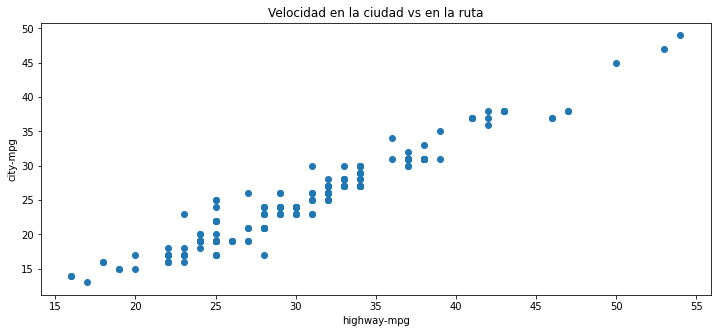

In [41]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(12)
plot1 = fig.add_subplot()
plot1.set_xlabel('highway-mpg')
plot1.set_ylabel('city-mpg')
plot1.set_title('Velocidad en la ciudad vs en la ruta')
plot1.scatter(df["highway-mpg"], df["city-mpg"])
plt.show()

In [42]:
X = df['highway-mpg']
X=np.array(X)

Y = df['city-mpg']
Y=np.array(Y)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [43]:
X_train_reshape=X_train.reshape(-1,1)
Y_train_reshape=Y_train.reshape(-1,1)

X_test_reshape=X_test.reshape(-1,1)
Y_test_reshape=Y_test.reshape(-1,1)

In [44]:
regresion=linear_model.LinearRegression()

regresion.fit(X_train_reshape,Y_train_reshape)

LinearRegression()

In [45]:
coef_regresion = regresion.coef_
intecept_y = regresion.intercept_

print(" Pendiente de la recta",coef_regresion,"\n", "Interseccion con el eje y",intecept_y )

 Pendiente de la recta [[0.92429766]] 
 Interseccion con el eje y [-3.18553956]


In [46]:
predict=regresion.predict(X_test_reshape)
mean_squared_error(Y_test_reshape, predict)
regresion.score(X_test_reshape, Y_test_reshape)

0.9741423680296635

Text(0, 0.5, 'Ciudad')

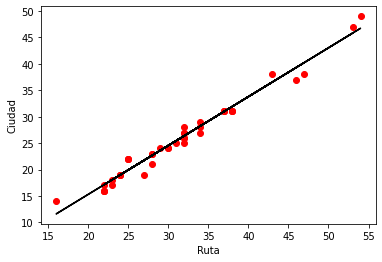

In [47]:
plt.scatter(X_test_reshape, Y_test_reshape, color = "r")
plt.plot(X_test_reshape, predict, color = "black")
plt.xlabel ("Ruta")
plt.ylabel ("Ciudad")

##Regresión Logistica

$$P(y |x, \beta) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 \cdot x)}}$$

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [49]:
df.tail()

Indice  normalized-losses   make fuel-type aspiration num-of-doors  \
200     200               95.0  volvo       gas        std         four   
201     201               95.0  volvo       gas      turbo         four   
202     202               95.0  volvo       gas        std         four   
203     203               95.0  volvo    diesel      turbo         four   
204     204               95.0  volvo       gas      turbo         four   

    body-style drive-wheels engine-location  wheel-base  ...  fuel-system  \
200      sedan          rwd           front       109.1  ...         mpfi   
201      sedan          rwd           front       109.1  ...         mpfi   
202      sedan          rwd           front       109.1  ...         mpfi   
203      sedan          rwd           front       109.1  ...          idi   
204      sedan          rwd           front       109.1  ...         mpfi   

     bore  stroke  compression-ratio horsepower peak-rpm  city-mpg  \
200  3.78    3.15                9.5      114.0   5400.0      23.0   
201  3.78    3.15                8.7      160.0   5300.0      19.0   
202  3.58    2.87                8.8      134.0   5500.0      18.0   
203  3.01    3.40               23.0      106.0   4800.0      26.0   
204  3.78    3.15                9.5      114.0   5400.0      19.0   

    highway-mpg    price  symboling  
200        28.0  16845.0        _-1  
201        25.0  19045.0        _-1  
202        23.0  21485.0        _-1  
203        27.0  22470.0        _-1  
204        25.0  22625.0        _-1  

[5 rows x 27 columns]

In [108]:
df.columns

Index(['Indice', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'symboling'],
      dtype='object')

In [50]:
df_RLog = pd.get_dummies(df, columns=['fuel-type'])

In [110]:
df_RLog.head()

Indice  normalized-losses         make aspiration num-of-doors  \
0       0              122.0  alfa-romero        std          two   
1       1              122.0  alfa-romero        std          two   
2       2              122.0  alfa-romero        std          two   
3       3              164.0         audi        std         four   
4       4              164.0         audi        std         four   

    body-style drive-wheels engine-location  wheel-base  length  ...  stroke  \
0  convertible          rwd           front        88.6   168.8  ...    2.68   
1  convertible          rwd           front        88.6   168.8  ...    2.68   
2    hatchback          rwd           front        94.5   171.2  ...    3.47   
3        sedan          fwd           front        99.8   176.6  ...    3.40   
4        sedan          4wd           front        99.4   176.6  ...    3.40   

   compression-ratio  horsepower peak-rpm city-mpg  highway-mpg    price  \
0                9.0       111.0   5000.0     21.0         27.0  13495.0   
1                9.0       111.0   5000.0     21.0         27.0  16500.0   
2                9.0       154.0   5000.0     19.0         26.0  16500.0   
3               10.0       102.0   5500.0     24.0         30.0  13950.0   
4                8.0       115.0   5500.0     18.0         22.0  17450.0   

   symboling  fuel-type_diesel  fuel-type_gas  
0         _3                 0              1  
1         _3                 0              1  
2         _1                 0              1  
3         _2                 0              1  
4         _2                 0              1  

[5 rows x 28 columns]

In [51]:
df_RLog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Indice             205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   aspiration         205 non-null    object 
 4   num-of-doors       205 non-null    object 
 5   body-style         205 non-null    object 
 6   drive-wheels       205 non-null    object 
 7   engine-location    205 non-null    object 
 8   wheel-base         205 non-null    float64
 9   length             205 non-null    float64
 10  width              205 non-null    float64
 11  height             205 non-null    float64
 12  curb-weight        205 non-null    float64
 13  engine-type        205 non-null    object 
 14  num-of-cylinders   205 non-null    object 
 15  engine-size        205 non-null    float64
 16  fuel-system        205 non

In [112]:
df_RLog.columns

Index(['Indice', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'symboling', 'fuel-type_diesel', 'fuel-type_gas'],
      dtype='object')

In [52]:
def drop_columns(df, columns):
    for column in columns:
        df.drop(column, axis=1, inplace=True)
        
list_drop_columns = ['make', 'aspiration','num-of-doors', 'body-style', 'drive-wheels',
                     'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system',
                     'symboling']

drop_columns(df_RLog,list_drop_columns)

In [53]:
df_RLog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Indice             205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   wheel-base         205 non-null    float64
 3   length             205 non-null    float64
 4   width              205 non-null    float64
 5   height             205 non-null    float64
 6   curb-weight        205 non-null    float64
 7   engine-size        205 non-null    float64
 8   bore               205 non-null    float64
 9   stroke             205 non-null    float64
 10  compression-ratio  205 non-null    float64
 11  horsepower         205 non-null    float64
 12  peak-rpm           205 non-null    float64
 13  city-mpg           205 non-null    float64
 14  highway-mpg        205 non-null    float64
 15  price              205 non-null    float64
 16  fuel-type_diesel   205 non

In [ ]:
# targets =  ['targets 1', 'targets 2', 'targets 3', 'targets 3']
# ys = [known_behaviors[p] for p in targets]

# predicted = [classifiers[i].predict(to_predict) for i in range(len(targets))]

# for i,p in enumerate(targets):
#     to_predict[p] = predicted[i]
# to_predict["id"] = unknown_behaviors["customer_id"]

# offers = to_predict
# offers.head()

# a = offers[offers.Mortgage == 1]
# b = offers[offers.Pension == 1]
# c = offers[offers.Savings == 1]
# print("Number of new customers: %d" %len(offers))
# print("Number of customers predicted to buy mortgages: %d" %len(a))
# print("Number of customers predicted to buy pensions: %d" %len(b))
# print("Number of customers predicted to buy savings: %d" %len(c))

In [54]:
inputs = df_RLog
target_gas = np.array(df_RLog['fuel-type_gas'])

In [56]:
inputs=np.array(inputs)
print(inputs.shape)
# inputs

(205, 18)


In [57]:
train_inputs, test_inputs, train_target, test_target= train_test_split(inputs, target_gas, test_size= 0.2, random_state=42)

In [58]:
print('train inputs', train_inputs.shape)
print('train target', train_target.shape)
print('test inputs', test_inputs.shape)
print('test target', test_target.shape)

train inputs (164, 18)
train target (164,)
test inputs (41, 18)
test target (41,)


In [59]:
train_target=np.array(train_target)

In [64]:
min_max_scaler= preprocessing.MinMaxScaler()

train_inputs_manmax=min_max_scaler.fit_transform(train_inputs)

In [65]:
from sklearn.linear_model    import LogisticRegression


In [70]:
reglog=LogisticRegression()
reglog.fit(train_inputs_manmax, train_target)

LogisticRegression()

In [71]:
test_inputs_manmax=min_max_scaler.fit_transform(test_inputs)

In [72]:
pred= reglog.predict(test_inputs_manmax)

In [73]:
test_target=np.array(test_target)

In [74]:
accuracy=accuracy_score(test_target, pred)

In [75]:
accuracy

1.0

In [76]:
cm=confusion_matrix(test_target,pred)
cm

array([[ 5,  0],
       [ 0, 36]], dtype=int64)

In [77]:
pred

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
      dtype=uint8)

In [149]:
test_target

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
      dtype=uint8)

In [150]:
pred == test_target

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

## Regularización 

In [79]:
from sklearn import linear_model

lasso_reg = linear_model.Lasso(alpha = 20, tol = 0.1) #L1

lasso_reg.fit(X_train_reshape, Y_train_reshape)

Lasso(alpha=20, tol=0.1)

In [80]:
lasso_reg.score(X_train_reshape, Y_train_reshape)

0.6735941012666907

In [81]:
lasso_reg.score (X_test_reshape, Y_test_reshape)

0.7053247422321873

In [155]:
predictL1 = lasso_reg.predict(X_test_reshape)

Text(0, 0.5, 'y')

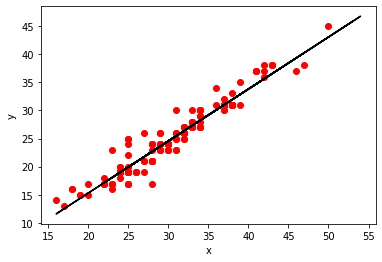

In [157]:
plt.scatter(X_train_reshape, Y_train_reshape, color = "r")
plt.plot(X_test_reshape, predict, color = "black")
plt.xlabel ("x")
plt.ylabel ("y")

In [159]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge (alpha = 10, tol = 0.1)
ridge_reg.fit (X_train_reshape, Y_train_reshape)

Ridge(alpha=10, tol=0.1)

In [160]:
ridge_reg.score (X_test_reshape, Y_test_reshape)

0.9741569297325429

In [161]:
from sklearn.linear_model import ElasticNet

elastic_reg1 = ElasticNet(l1_ratio = 1, alpha = 20)
elastic_reg1.fit(X_train_reshape, y_train_reshape)

elastic_reg2 = ElasticNet(l1_ratio = 0, alpha = 10,tol = 0.1)
elastic_reg2.fit(X_train_reshape, y_train_reshape)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.122e+04, tolerance: 2.633e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


ElasticNet(alpha=10, l1_ratio=0, tol=0.1)

In [163]:
print(elastic_reg1.score (X_test_reshape, Y_test_reshape))
print(elastic_reg2.score (X_test_reshape, Y_test_reshape))

-121.89271744697008
-117.89174468330314


### SVM

##SVM Todavia no vi nada de esto

In [ ]:
from sklearn.svm import SVC

In [ ]:
clima_df=pd.read_csv('/content/drive/MyDrive/Inteligencia Artificial/Materia/2021/Clase 7 SVM MLP/clima_curadav3.csv')

FileNotFoundError: ignored

In [ ]:
inputs=clima_df.drop(columns=['RainToday'])
target=np.array(clima_df['RainToday'])

In [ ]:
inputs=np.array(inputs)

In [ ]:
train_inputs, test_inputs, train_target, test_target = train_test_split(inputs, target, test_size = 0.2, random_state = 42) 

In [ ]:
print('train inputs', train_inputs.shape)
print('train targets', train_target.shape)
print('test inputs', test_inputs.shape)
print('test targtet', test_target.shape)

In [ ]:
svm=SVC()
svm.fit(train_inputs,train_target)

In [ ]:
pred=svm.predict(test_inputs)

In [ ]:
accuracy=accuracy_score(test_target, pred)
accuracy

In [ ]:
cm=confusion_matrix(test_target, pred)
cm

In [ ]:
svm1=SVC(kernel='linear')
svm1.fit(train_inputs,train_target)

In [ ]:
pred1=svm1.predict(test_inputs)

In [ ]:
accuracy1=accuracy_score(test_target, pred1)
accuracy1

In [ ]:
cm=confusion_matrix(test_target, pred1)
cm

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cm_df=pd.DataFrame(cm)
cm_df

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(cm_df, annot=True) #, cmap= "YlGnBu"  annot_kws={"size": 25}, cbar=False);
plt.xlabel('Predictions');
plt.ylabel('Target');

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(cm_df, annot=True, cmap= "YlGnBu",  annot_kws={"size": 25}, cbar=False);
plt.xlabel('Predictions');
plt.ylabel('Target');